<a href="https://colab.research.google.com/github/zaraandreia/BigData/blob/main/hadoop_hdfs_mapreduce_agnmt3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Big Data Technologies @ UCP

Welcome to this hands-on class on building Big Data applications using Hadoop,  HDFS, MapReduce, MRJob, Hive and Pig. 

This Jupyter Notebook exemplifies how to:
- [install Java](#install_java)
- [install Hadoop](#install_hadoop)
- [run HDFS operations](#hdfs)
- [run MapReduce programs](#mapreduce)
- [run MRJob programs](#mrjob)
- [install Hive](#install_hive)
- [run Hive programs](#hive)
- [install Pig](#install_pig)
- [run Pig programs](#pig)
- [solve a "real" challenge](#challenge)


In [1]:
# constants
HADOOP_VERSION = "3.3.1"
HADOOP_HOME = "/usr/local/hadoop-"+HADOOP_VERSION
HIVE_VERSION = "3.1.2"
HIVE_HOME = "/usr/local/apache-hive-"+HIVE_VERSION+"-bin"
PIG_VERSION = "0.17.0"
PIG_HOME = "/usr/local/pig-"+PIG_VERSION
GIT_REPOSITORY = "/malcosta/bigdatatechnologies"
GIT_FILES = "https://raw.githubusercontent.com" + GIT_REPOSITORY + "/main"

# Licensing

*The source code in this notebook is licensed under the* [*Apache License, Version 2.0*](https://www.apache.org/licenses/LICENSE-2.0).

*This notebook is licensed under the* [*Creative Commons Attribution-NonCommercial-ShareAlike 4.0 License*](https://creativecommons.org/licenses/by-nc-sa/4.0).

Developed by [*Miguel Costa*](https://www.linkedin.com/in/migcosta/)

<a name="install_java"></a>
# Java Installation

It needs Java version 8 for Hive compatibility

In [2]:
# check current Java version
!java -version

openjdk version "11.0.13" 2021-10-19
OpenJDK Runtime Environment (build 11.0.13+8-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.13+8-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)


In [3]:
!apt-get update > /dev/null

In [4]:
# install JAVA version 8
!apt-get install openjdk-8-jre > /dev/null

In [5]:
import os
os.environ['JAVA_HOME'] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ['PATH'] = os.environ['JAVA_HOME']+"/bin:"+os.environ['PATH']

In [6]:
# check environment variablea
!echo $JAVA_HOME
!echo $PATH

/usr/lib/jvm/java-8-openjdk-amd64
/usr/lib/jvm/java-8-openjdk-amd64/bin:/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin


In [7]:
!java -version

openjdk version "1.8.0_312"
OpenJDK Runtime Environment (build 1.8.0_312-8u312-b07-0ubuntu1~18.04-b07)
OpenJDK 64-Bit Server VM (build 25.312-b07, mixed mode)


<a name="install_hadoop"></a>
# Hadoop Installation (Single Node)

In [8]:
# download hadoop (check last version at https://hadoop.apache.org/releases.html)
!wget https://downloads.apache.org/hadoop/common/hadoop-{HADOOP_VERSION}/hadoop-{HADOOP_VERSION}.tar.gz

--2022-02-23 10:25:19--  https://downloads.apache.org/hadoop/common/hadoop-3.3.1/hadoop-3.3.1.tar.gz
Resolving downloads.apache.org (downloads.apache.org)... 88.99.95.219, 135.181.214.104, 2a01:4f9:3a:2c57::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|88.99.95.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 605187279 (577M) [application/x-gzip]
Saving to: ‘hadoop-3.3.1.tar.gz’

hadoop-3.3.1.tar.gz 100%[===================>] 577.15M  10.5MB/s    in 56s     

2022-02-23 10:26:16 (10.3 MB/s) - ‘hadoop-3.3.1.tar.gz’ saved [605187279/605187279]



In [9]:
# uncompress hadoop file
!tar -xzvf hadoop-{HADOOP_VERSION}.tar.gz > /dev/null

In [10]:
# move hadoop directory
!mv hadoop-{HADOOP_VERSION}/ /usr/local/

In [11]:
# set HADOOP_HOME environment variable
os.environ['HADOOP_HOME'] = HADOOP_HOME

In [12]:
# check environment variable
!echo $HADOOP_HOME

/usr/local/hadoop-3.3.1


In [13]:
# see list of Hadoop commands
!{HADOOP_HOME}/bin/hadoop

Usage: hadoop [OPTIONS] SUBCOMMAND [SUBCOMMAND OPTIONS]
 or    hadoop [OPTIONS] CLASSNAME [CLASSNAME OPTIONS]
  where CLASSNAME is a user-provided Java class

  OPTIONS is none or any of:

buildpaths                       attempt to add class files from build tree
--config dir                     Hadoop config directory
--debug                          turn on shell script debug mode
--help                           usage information
hostnames list[,of,host,names]   hosts to use in slave mode
hosts filename                   list of hosts to use in slave mode
loglevel level                   set the log4j level for this command
workers                          turn on worker mode

  SUBCOMMAND is one of:


    Admin Commands:

daemonlog     get/set the log level for each daemon

    Client Commands:

archive       create a Hadoop archive
checknative   check native Hadoop and compression libraries availability
classpath     prints the class path needed to get the Hadoop jar and the
    

In [14]:
# see Hadoop version
!{HADOOP_HOME}/bin/hadoop version

Hadoop 3.3.1
Source code repository https://github.com/apache/hadoop.git -r a3b9c37a397ad4188041dd80621bdeefc46885f2
Compiled by ubuntu on 2021-06-15T05:13Z
Compiled with protoc 3.7.1
From source with checksum 88a4ddb2299aca054416d6b7f81ca55
This command was run using /usr/local/hadoop-3.3.1/share/hadoop/common/hadoop-common-3.3.1.jar


In [15]:
# see Hadoop environment variables 
!{HADOOP_HOME}/bin/hadoop envvars

JAVA_HOME='/usr/lib/jvm/java-8-openjdk-amd64'
HADOOP_COMMON_HOME='/usr/local/hadoop-3.3.1'
HADOOP_COMMON_DIR='share/hadoop/common'
HADOOP_COMMON_LIB_JARS_DIR='share/hadoop/common/lib'
HADOOP_COMMON_LIB_NATIVE_DIR='lib/native'
HADOOP_CONF_DIR='/usr/local/hadoop-3.3.1/etc/hadoop'
HADOOP_TOOLS_HOME='/usr/local/hadoop-3.3.1'
HADOOP_TOOLS_DIR='share/hadoop/tools'
HADOOP_TOOLS_LIB_JARS_DIR='share/hadoop/tools/lib'


<a name="hdfs"></a>
# HDFS Operations

In [16]:
# see list of HDFS commands
!{HADOOP_HOME}/bin/hdfs

Usage: hdfs [OPTIONS] SUBCOMMAND [SUBCOMMAND OPTIONS]

  OPTIONS is none or any of:

--buildpaths                       attempt to add class files from build tree
--config dir                       Hadoop config directory
--daemon (start|status|stop)       operate on a daemon
--debug                            turn on shell script debug mode
--help                             usage information
--hostnames list[,of,host,names]   hosts to use in worker mode
--hosts filename                   list of hosts to use in worker mode
--loglevel level                   set the log4j level for this command
--workers                          turn on worker mode

  SUBCOMMAND is one of:


    Admin Commands:

cacheadmin           configure the HDFS cache
crypto               configure HDFS encryption zones
debug                run a Debug Admin to execute HDFS debug commands
dfsadmin             run a DFS admin client
dfsrouteradmin       manage Router-based federation
ec                   run a HD

In [17]:
# format namenode
#!{HADOOP_HOME}/bin/hdfs namenode -format

In [18]:
# start the namenode and datanodes (and YARN)
#!nohup {HADOOP_HOME}/sbin/start-all.sh	&

In [19]:
# see the list of filesystem commands available on HDFS:
!{HADOOP_HOME}/bin/hdfs dfs

Usage: hadoop fs [generic options]
	[-appendToFile <localsrc> ... <dst>]
	[-cat [-ignoreCrc] <src> ...]
	[-checksum [-v] <src> ...]
	[-chgrp [-R] GROUP PATH...]
	[-chmod [-R] <MODE[,MODE]... | OCTALMODE> PATH...]
	[-chown [-R] [OWNER][:[GROUP]] PATH...]
	[-concat <target path> <src path> <src path> ...]
	[-copyFromLocal [-f] [-p] [-l] [-d] [-t <thread count>] <localsrc> ... <dst>]
	[-copyToLocal [-f] [-p] [-ignoreCrc] [-crc] <src> ... <localdst>]
	[-count [-q] [-h] [-v] [-t [<storage type>]] [-u] [-x] [-e] [-s] <path> ...]
	[-cp [-f] [-p | -p[topax]] [-d] <src> ... <dst>]
	[-createSnapshot <snapshotDir> [<snapshotName>]]
	[-deleteSnapshot <snapshotDir> <snapshotName>]
	[-df [-h] [<path> ...]]
	[-du [-s] [-h] [-v] [-x] <path> ...]
	[-expunge [-immediate] [-fs <path>]]
	[-find <path> ... <expression> ...]
	[-get [-f] [-p] [-ignoreCrc] [-crc] <src> ... <localdst>]
	[-getfacl [-R] <path>]
	[-getfattr [-R] {-n name | -d} [-e en] <path>]
	[-getmerge [-nl] [-skip-empty-file] <src> <localdst>]

In [20]:
# list txt files (examples) in local file system
!ls {HADOOP_HOME}/*.txt

/usr/local/hadoop-3.3.1/LICENSE.txt  /usr/local/hadoop-3.3.1/README.txt
/usr/local/hadoop-3.3.1/NOTICE.txt


In [21]:
# create directory in HDFS
!{HADOOP_HOME}/bin/hdfs dfs -mkdir ~/input/

In [22]:
# copy input (txt) files from local file system to HDFS directory
!{HADOOP_HOME}/bin/hdfs dfs -copyFromLocal {HADOOP_HOME}/*.txt ~/input/

In [23]:
# copy input (txt) files between HDFS directories
!{HADOOP_HOME}/bin/hdfs dfs -mkdir ~/input2/
!{HADOOP_HOME}/bin/hdfs dfs -cp ~/input/* ~/input2/

In [24]:
# list txt files in HDFS directories
!{HADOOP_HOME}/bin/hdfs dfs -ls ~/input/ ~/input2/

Found 3 items
-rw-r--r--   1 root root      15217 2022-02-23 10:26 /root/input/LICENSE.txt
-rw-r--r--   1 root root       1541 2022-02-23 10:26 /root/input/NOTICE.txt
-rw-r--r--   1 root root        175 2022-02-23 10:26 /root/input/README.txt
Found 3 items
-rw-r--r--   1 root root      15217 2022-02-23 10:26 /root/input2/LICENSE.txt
-rw-r--r--   1 root root       1541 2022-02-23 10:26 /root/input2/NOTICE.txt
-rw-r--r--   1 root root        175 2022-02-23 10:26 /root/input2/README.txt


In [25]:
# delete file in HDFS
!{HADOOP_HOME}/bin/hdfs dfs -rm -r ~/input2/LICENSE.txt
!{HADOOP_HOME}/bin/hdfs dfs -ls ~/input2/

2022-02-23 10:26:40,639 INFO Configuration.deprecation: io.bytes.per.checksum is deprecated. Instead, use dfs.bytes-per-checksum
Deleted /root/input2/LICENSE.txt
Found 2 items
-rw-r--r--   1 root root       1541 2022-02-23 10:26 /root/input2/NOTICE.txt
-rw-r--r--   1 root root        175 2022-02-23 10:26 /root/input2/README.txt


In [26]:
# delete directory recursively in HDFS
!{HADOOP_HOME}/bin/hdfs dfs -rm -r ~/input2/

2022-02-23 10:26:43,519 INFO Configuration.deprecation: io.bytes.per.checksum is deprecated. Instead, use dfs.bytes-per-checksum
Deleted /root/input2


In [27]:
# show file content
!{HADOOP_HOME}/bin/hdfs dfs -cat ~/input/README.txt

For the latest information about Hadoop, please visit our website at:

   http://hadoop.apache.org/

and our wiki, at:

   https://cwiki.apache.org/confluence/display/HADOOP/


In [28]:
# show file size
!{HADOOP_HOME}/bin/hdfs dfs -du -h ~/input/README.txt

175  175  /root/input/README.txt


In [29]:
# create local directory
!mkdir ~/localdir

# copy input (txt) file from HDFS directory to local file system
!{HADOOP_HOME}/bin/hdfs dfs -copyToLocal ~/input/NOTICE.txt ~/localdir/

# list local directory
!ls ~/localdir/

NOTICE.txt


<a name="mapreduce"></a>
# MapReduce Programs

## Java programs

In [ ]:
# show list of mapreduce implemented examples
!{HADOOP_HOME}/bin/hadoop jar {HADOOP_HOME}/share/hadoop/mapreduce/hadoop-mapreduce-examples-{HADOOP_VERSION}.jar

An example program must be given as the first argument.
Valid program names are:
  aggregatewordcount: An Aggregate based map/reduce program that counts the words in the input files.
  aggregatewordhist: An Aggregate based map/reduce program that computes the histogram of the words in the input files.
  bbp: A map/reduce program that uses Bailey-Borwein-Plouffe to compute exact digits of Pi.
  dbcount: An example job that count the pageview counts from a database.
  distbbp: A map/reduce program that uses a BBP-type formula to compute exact bits of Pi.
  grep: A map/reduce program that counts the matches of a regex in the input.
  join: A job that effects a join over sorted, equally partitioned datasets
  multifilewc: A job that counts words from several files.
  pentomino: A map/reduce tile laying program to find solutions to pentomino problems.
  pi: A map/reduce program that estimates Pi using a quasi-Monte Carlo method.
  randomtextwriter: A map/reduce program that writes 10GB of r

In [ ]:
# run mapreduce wordcount example on txt files
!{HADOOP_HOME}/bin/hadoop jar {HADOOP_HOME}/share/hadoop/mapreduce/hadoop-mapreduce-examples-{HADOOP_VERSION}.jar wordcount ~/input ~/output

2022-02-05 14:45:15,954 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2022-02-05 14:45:16,053 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2022-02-05 14:45:16,053 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2022-02-05 14:45:16,258 INFO input.FileInputFormat: Total input files to process : 3
2022-02-05 14:45:16,292 INFO mapreduce.JobSubmitter: number of splits:3
2022-02-05 14:45:16,492 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local603425945_0001
2022-02-05 14:45:16,492 INFO mapreduce.JobSubmitter: Executing with tokens: []
2022-02-05 14:45:16,658 INFO mapreduce.Job: The url to track the job: http://localhost:8080/
2022-02-05 14:45:16,659 INFO mapreduce.Job: Running job: job_local603425945_0001
2022-02-05 14:45:16,666 INFO mapred.LocalJobRunner: OutputCommitter set in config null
2022-02-05 14:45:16,674 INFO output.FileOutputCommitter: File Output Committer Algorithm version is 2
2022-02-

In [ ]:
# output is stored in part* files
!{HADOOP_HOME}/bin/hdfs dfs -ls ~/output/

Found 2 items
-rw-r--r--   1 root root          0 2022-02-05 14:45 /root/output/_SUCCESS
-rw-r--r--   1 root root      11048 2022-02-05 14:45 /root/output/part-r-00000


In [ ]:
# print wordcount program output (top 10 lines)
!{HADOOP_HOME}/bin/hdfs dfs -cat ~/output/part-r-00000 | head -n 10

"AS	2
"Contribution"	1
"Contributor"	1
"Derivative	1
"Legal	1
"License"	1
"License");	1
"Licensor"	1
"NOTICE"	1
"Not	1
cat: Unable to write to output stream.


## *Unix (executable) programs

In [ ]:
# rm output directory from HDFS
!{HADOOP_HOME}/bin/hdfs dfs -rm -r ~/output/

2022-02-05 14:46:18,706 INFO Configuration.deprecation: io.bytes.per.checksum is deprecated. Instead, use dfs.bytes-per-checksum
Deleted /root/output


In [ ]:
# count number of words with unix programs
!echo "w1 w2 w3 w4 w1 w3 w4 w4 w1 w4" | sed "s/ /\n/g" | sort | uniq -c

      3 w1
      1 w2
      2 w3
      4 w4


In [ ]:
# count the number of words using MapReduce with Hadoop streaming using standard Linux commands
!{HADOOP_HOME}/bin/hadoop jar {HADOOP_HOME}/share/hadoop/tools/lib/hadoop-streaming-{HADOOP_VERSION}.jar \
    -input ~/input/ \
    -output ~/output/ \
    -mapper 'sed "s/ /\n/g"' \
    -reducer 'uniq -c'

2022-02-05 14:47:02,365 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2022-02-05 14:47:02,456 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2022-02-05 14:47:02,456 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2022-02-05 14:47:02,473 WARN impl.MetricsSystemImpl: JobTracker metrics system already initialized!
2022-02-05 14:47:02,675 INFO mapred.FileInputFormat: Total input files to process : 3
2022-02-05 14:47:02,701 INFO mapreduce.JobSubmitter: number of splits:3
2022-02-05 14:47:02,888 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local1776202724_0001
2022-02-05 14:47:02,888 INFO mapreduce.JobSubmitter: Executing with tokens: []
2022-02-05 14:47:03,065 INFO mapreduce.Job: The url to track the job: http://localhost:8080/
2022-02-05 14:47:03,067 INFO mapreduce.Job: Running job: job_local1776202724_0001
2022-02-05 14:47:03,075 INFO mapred.LocalJobRunner: OutputCommitter set in config null
2022-02

In [ ]:
# check if the job was successful. The output directory should contain an empty file called _SUCCESS
!{HADOOP_HOME}/bin/hdfs dfs -ls ~/output/

Found 2 items
-rw-r--r--   1 root root          0 2022-02-05 14:47 /root/output/_SUCCESS
-rw-r--r--   1 root root      16335 2022-02-05 14:47 /root/output/part-00000


In [ ]:
# show the content of the MapReduce job output in the file part-*
!{HADOOP_HOME}/bin/hdfs dfs -cat ~/output/part-00000 | head -n 10

   1171 	
      2 "AS	
      1 "Contribution"	
      1 "Contributor"	
      1 "Derivative	
      1 "Legal	
      1 "License"	
      1 "License");	
      1 "Licensor"	
      1 "NOTICE"	
cat: Unable to write to output stream.


## Python Programs

### word count

In [ ]:
# download wordCountMap.py (get link from Github)
!wget {GIT_FILES}/mapreduce/wordcountmap.py -O ~/wordCountMap.py

--2022-02-05 14:49:32--  https://raw.githubusercontent.com/malcosta/bigdatatechnologies/main/mapreduce/wordcountmap.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 174 [text/plain]
Saving to: ‘/root/wordCountMap.py’

/root/wordCountMap. 100%[===================>]     174  --.-KB/s    in 0s      

2022-02-05 14:49:32 (7.31 MB/s) - ‘/root/wordCountMap.py’ saved [174/174]



In [ ]:
# test wordCountMap.py
!echo "x1 x2 y1 y2 x2 y1" | python ~/wordCountMap.py

x1	1
x2	1
y1	1
y2	1
x2	1
y1	1


In [ ]:
# download wordCountReduce.py (get link from Github)
!wget {GIT_FILES}/mapreduce/wordcountreduce.py -O ~/wordCountReduce.py

--2022-02-05 14:50:04--  https://raw.githubusercontent.com/malcosta/bigdatatechnologies/main/mapreduce/wordcountreduce.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381 [text/plain]
Saving to: ‘/root/wordCountReduce.py’

/root/wordCountRedu 100%[===================>]     381  --.-KB/s    in 0s      

2022-02-05 14:50:05 (29.3 MB/s) - ‘/root/wordCountReduce.py’ saved [381/381]



In [ ]:
# test wordCountReduce.py
!echo -e "x1\t1 \n x1\t1 \n x2\t1 \n y1\t1 \n y2\t1 \n y2\t1" | python ~/wordCountReduce.py

x1	2
x2	1
y1	1
y2	2


In [ ]:
# count number of words using MapReduce with Hadoop streaming
# it uses 10 map tasks and 2 reduce tasks. The output will be stored into two different HDFS directories
!{HADOOP_HOME}/bin/hadoop jar {HADOOP_HOME}/share/hadoop/tools/lib/hadoop-streaming-{HADOOP_VERSION}.jar \
    -D mapred.reduce.tasks=2 \
    -D mapred.map.tasks=10 \
    -input ~/input/ \
    -output ~/output2/ \
    -mapper wordCountMap.py \
    -reducer wordCountReduce.py \
    -file ~/wordCountMap.py ~/wordCountReduce.py

2022-02-05 14:51:03,060 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
packageJobJar: [/root/wordCountMap.py, /root/wordCountReduce.py] [] /tmp/streamjob5266939653478677554.jar tmpDir=null
2022-02-05 14:51:03,737 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2022-02-05 14:51:03,824 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2022-02-05 14:51:03,824 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2022-02-05 14:51:03,839 WARN impl.MetricsSystemImpl: JobTracker metrics system already initialized!
2022-02-05 14:51:03,994 INFO mapred.FileInputFormat: Total input files to process : 3
2022-02-05 14:51:04,014 INFO mapreduce.JobSubmitter: number of splits:3
2022-02-05 14:51:04,052 INFO Configuration.deprecation: mapred.reduce.tasks is deprecated. Instead, use mapreduce.job.reduces
2022-02-05 14:51:04,053 INFO Configuration.deprecation: mapred.map.tasks is deprecated. I

In [ ]:
# list job output directory
!{HADOOP_HOME}/bin/hdfs dfs -ls ~/output2/

Found 3 items
-rw-r--r--   1 root root          0 2022-02-05 14:51 /root/output2/_SUCCESS
-rw-r--r--   1 root root       6343 2022-02-05 14:51 /root/output2/part-00000
-rw-r--r--   1 root root       4705 2022-02-05 14:51 /root/output2/part-00001


In [ ]:
# see job output content
!{HADOOP_HOME}/bin/hdfs dfs -cat /root/output2/* | head -n 10

"Contributor"	1
"Derivative	1
"Legal	1
"License"	1
"License");	1
"Licensor"	1
"Not	1
"Object"	1
"Source"	1
"Work"	1
cat: Unable to write to output stream.
cat: Unable to write to output stream.


### sort

In [ ]:
# sort in descending order the job output content with unix commands (sort options: k2=field 2, n=numeric, r=reverse)
!{HADOOP_HOME}/bin/hdfs dfs -cat ~/output2/* | sort -k2nr | head -n 10

the	108
of	68
or	64
and	49
to	41
any	29
in	24
You	23
by	22
for	22


In [ ]:
# download identityMap.py (get link from Github)
!wget {GIT_FILES}/mapreduce/identitymap.py -O ~/identityMap.py

--2022-02-05 14:52:23--  https://raw.githubusercontent.com/malcosta/bigdatatechnologies/main/mapreduce/identitymap.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 151 [text/plain]
Saving to: ‘/root/identityMap.py’

/root/identityMap.p 100%[===================>]     151  --.-KB/s    in 0s      

2022-02-05 14:52:23 (8.15 MB/s) - ‘/root/identityMap.py’ saved [151/151]



In [ ]:
# sort by second field (count) in descending order by numeric value using KeyFieldBasedComparator
!{HADOOP_HOME}/bin/hadoop jar {HADOOP_HOME}/share/hadoop/tools/lib/hadoop-streaming-{HADOOP_VERSION}.jar \
    -D mapred.output.key.comparator.class=org.apache.hadoop.mapred.lib.KeyFieldBasedComparator \
    -D mapred.text.key.comparator.options=-k2nr \
    -D stream.num.map.output.key.fields=2 \
    -D mapred.map.tasks=10 \
    -D mapred.reduce.tasks=1 \
    -input ~/output2/ \
    -output ~/output3/ \
    -mapper identityMap.py \
    -reducer identityMap.py \
    -file ~/identityMap.py

2022-02-05 14:53:12,792 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
packageJobJar: [/root/identityMap.py] [] /tmp/streamjob1096358425603755342.jar tmpDir=null
2022-02-05 14:53:13,477 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2022-02-05 14:53:13,569 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2022-02-05 14:53:13,569 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2022-02-05 14:53:13,591 WARN impl.MetricsSystemImpl: JobTracker metrics system already initialized!
2022-02-05 14:53:13,775 INFO mapred.FileInputFormat: Total input files to process : 2
2022-02-05 14:53:13,796 INFO mapreduce.JobSubmitter: number of splits:2
2022-02-05 14:53:13,825 INFO Configuration.deprecation: mapred.reduce.tasks is deprecated. Instead, use mapreduce.job.reduces
2022-02-05 14:53:13,827 INFO Configuration.deprecation: mapred.map.tasks is deprecated. Instead, use mapreduce.job.m

In [ ]:
# show job output
!{HADOOP_HOME}/bin/hdfs dfs -cat ~/output3/part-00000 | head -n 10

the	108
of	68
or	64
and	49
to	41
any	29
in	24
You	23
for	22
by	22
cat: Unable to write to output stream.


In [ ]:
# download swapMap.py (get link from Github)
!wget {GIT_FILES}/mapreduce/swapmap.py -O ~/swapMap.py

--2022-02-05 14:54:05--  https://raw.githubusercontent.com/malcosta/bigdatatechnologies/main/mapreduce/swapmap.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 151 [text/plain]
Saving to: ‘/root/swapMap.py’

/root/swapMap.py    100%[===================>]     151  --.-KB/s    in 0s      

2022-02-05 14:54:05 (12.5 MB/s) - ‘/root/swapMap.py’ saved [151/151]



In [ ]:
# mapper swap key and value, and reducer do not apply any transformation (using IdentityReducer). KeyFieldBasedComparator sort key in descending order by numeric value
!{HADOOP_HOME}/bin/hadoop jar {HADOOP_HOME}/share/hadoop/tools/lib/hadoop-streaming-{HADOOP_VERSION}.jar \
    -D mapred.output.key.comparator.class=org.apache.hadoop.mapred.lib.KeyFieldBasedComparator \
    -D mapred.text.key.comparator.options=-k1nr \
    -D mapred.map.tasks=10 \
    -D mapred.reduce.tasks=1 \
    -input ~/output2/ \
    -output ~/output4/ \
    -mapper swapMap.py \
    -file ~/swapMap.py \
    -reducer org.apache.hadoop.mapred.lib.IdentityReducer


2022-02-05 14:59:40,771 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
packageJobJar: [/root/swapMap.py] [] /tmp/streamjob4840302476713548562.jar tmpDir=null
2022-02-05 14:59:41,402 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2022-02-05 14:59:41,497 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2022-02-05 14:59:41,497 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2022-02-05 14:59:41,515 WARN impl.MetricsSystemImpl: JobTracker metrics system already initialized!
2022-02-05 14:59:41,711 INFO mapred.FileInputFormat: Total input files to process : 2
2022-02-05 14:59:41,727 INFO mapreduce.JobSubmitter: number of splits:2
2022-02-05 14:59:41,759 INFO Configuration.deprecation: mapred.reduce.tasks is deprecated. Instead, use mapreduce.job.reduces
2022-02-05 14:59:41,761 INFO Configuration.deprecation: mapred.map.tasks is deprecated. Instead, use mapreduce.job.maps


In [ ]:
# show job output (key and value are swapped)
!{HADOOP_HOME}/bin/hdfs dfs -cat ~/output4/part-00000 | head -n 10

108	the
68	of
64	or
49	and
41	to
29	any
24	in
23	You
22	for
22	by
cat: Unable to write to output stream.


In [ ]:
# mapper swap key and value, and reducer applies another swap after sorting. KeyFieldBasedComparator sort key in descending order by numeric value
!{HADOOP_HOME}/bin/hadoop jar {HADOOP_HOME}/share/hadoop/tools/lib/hadoop-streaming-{HADOOP_VERSION}.jar \
    -D mapred.output.key.comparator.class=org.apache.hadoop.mapred.lib.KeyFieldBasedComparator \
    -D mapred.text.key.comparator.options=-k1nr \
    -D mapred.map.tasks=10 \
    -D mapred.reduce.tasks=1 \
    -input ~/output2/ \
    -output ~/output5/ \
    -mapper swapMap.py \
    -file ~/swapMap.py \
    -reducer swapMap.py

2022-02-05 15:02:08,406 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
packageJobJar: [/root/swapMap.py] [] /tmp/streamjob2114951029136598032.jar tmpDir=null
2022-02-05 15:02:09,013 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2022-02-05 15:02:09,101 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2022-02-05 15:02:09,101 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2022-02-05 15:02:09,116 WARN impl.MetricsSystemImpl: JobTracker metrics system already initialized!
2022-02-05 15:02:09,255 INFO mapred.FileInputFormat: Total input files to process : 2
2022-02-05 15:02:09,274 INFO mapreduce.JobSubmitter: number of splits:2
2022-02-05 15:02:09,309 INFO Configuration.deprecation: mapred.reduce.tasks is deprecated. Instead, use mapreduce.job.reduces
2022-02-05 15:02:09,310 INFO Configuration.deprecation: mapred.map.tasks is deprecated. Instead, use mapreduce.job.maps


In [ ]:
# show job output
!{HADOOP_HOME}/bin/hdfs dfs -cat ~/output5/part-00000 | head -n 10

the	108
of	68
or	64
and	49
to	41
any	29
in	24
You	23
for	22
by	22
cat: Unable to write to output stream.


### passing arguments

In [ ]:
# download wordCountMap_args.py (get link from Github)
!wget {GIT_FILES}/mapreduce/wordcountmap_args.py -O ~/wordCountMap_args.py

--2022-02-05 15:02:27--  https://raw.githubusercontent.com/malcosta/bigdatatechnologies/main/mapreduce/wordcountmap_args.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 234 [text/plain]
Saving to: ‘/root/wordCountMap_args.py’

/root/wordCountMap_ 100%[===================>]     234  --.-KB/s    in 0s      

2022-02-05 15:02:27 (10.2 MB/s) - ‘/root/wordCountMap_args.py’ saved [234/234]



In [ ]:
# count number of words where each word count is arg1 * arg2
!{HADOOP_HOME}/bin/hadoop jar {HADOOP_HOME}/share/hadoop/tools/lib/hadoop-streaming-{HADOOP_VERSION}.jar \
    -D mapred.reduce.tasks=1 \
    -D mapred.map.tasks=10 \
    -input ~/input/ \
    -output ~/output6/ \
    -mapper "wordCountMap_args.py 2 1"\
    -reducer wordCountReduce.py \
    -file ~/wordCountMap_args.py ~/wordCountReduce.py

2022-02-05 15:06:07,118 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
packageJobJar: [/root/wordCountMap_args.py, /root/wordCountReduce.py] [] /tmp/streamjob8067613564431778769.jar tmpDir=null
2022-02-05 15:06:07,707 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2022-02-05 15:06:07,845 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2022-02-05 15:06:07,846 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2022-02-05 15:06:07,861 WARN impl.MetricsSystemImpl: JobTracker metrics system already initialized!
2022-02-05 15:06:08,037 INFO mapred.FileInputFormat: Total input files to process : 3
2022-02-05 15:06:08,056 INFO mapreduce.JobSubmitter: number of splits:3
2022-02-05 15:06:08,084 INFO Configuration.deprecation: mapred.reduce.tasks is deprecated. Instead, use mapreduce.job.reduces
2022-02-05 15:06:08,085 INFO Configuration.deprecation: mapred.map.tasks is deprecat

In [ ]:
# show job output
!{HADOOP_HOME}/bin/hdfs dfs -cat ~/output6/part-00000 | head -n 10

"AS	4
"Contribution"	2
"Contributor"	2
"Derivative	2
"Legal	2
"License"	2
"License");	2
"Licensor"	2
"NOTICE"	2
"Not	2
cat: Unable to write to output stream.


### plot wordcloud

In [ ]:
# copy word frequencies from HDFS to local file system
!{HADOOP_HOME}/bin/hdfs dfs -copyToLocal ~/output6/part-00000 ~/wordfreq.tsv

In [ ]:
# read wordfreq.tsv to dictionary
import pandas as pd
pd_wordfreq = pd.read_csv('~/wordfreq.tsv', header=None, sep='\t')
dict_wordfreq = dict(zip(pd_wordfreq[0],pd_wordfreq[1])) 

In [ ]:
# install wordcloud library
!pip install wordcloud --quiet

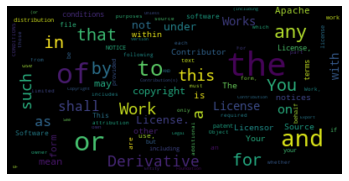

In [ ]:
# plot wordcloud image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=40, max_words = 100).generate_from_frequencies(dict_wordfreq)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<a name="mrjob"></a>
# MRJob Programs

In [ ]:
# install mrjob library from Yelp (https://github.com/Yelp/mrjob)
!pip install mrjob --quiet

     |████████████████████████████████| 439 kB 4.4 MB/s 


In [ ]:
# download mrjob code for word count
!wget {GIT_FILES}/mrjob/wordcount_mrjob.py -O ~/wordcount_mrjob.py

--2022-02-05 15:10:07--  https://raw.githubusercontent.com/malcosta/bigdatatechnologies/main/mrjob/wordcount_mrjob.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 965 [text/plain]
Saving to: ‘/root/wordcount_mrjob.py’

/root/wordcount_mrj 100%[===================>]     965  --.-KB/s    in 0s      

2022-02-05 15:10:07 (63.7 MB/s) - ‘/root/wordcount_mrjob.py’ saved [965/965]



In [ ]:
# run mrjob
!python ~/wordcount_mrjob.py ~/input/ --jobconf mapreduce.job.maps=10 --jobconf mapreduce.job.reduces=1 -o ~/output7/

No configs found; falling back on auto-configuration
No configs specified for inline runner
Running step 1 of 2...
Creating temp directory /tmp/wordcount_mrjob.root.20220205.151203.602599
Running step 2 of 2...
job output is in /root/output7/
Removing temp directory /tmp/wordcount_mrjob.root.20220205.151203.602599...


In [ ]:
# show job output
!{HADOOP_HOME}/bin/hdfs dfs -cat ~/output7/part-00000 | head -n 10

"the"	108
"of"	68
"or"	64
"and"	49
"to"	41
"any"	29
"in"	24
"You"	23
"that"	22
"by"	22


<a name="install_hive"></a>
# Hive Installation

In [30]:
# download hive (check last version at https://dlcdn.apache.org/hive/)
!wget https://dlcdn.apache.org/hive/hive-{HIVE_VERSION}/apache-hive-{HIVE_VERSION}-bin.tar.gz

--2022-02-23 10:26:48--  https://dlcdn.apache.org/hive/hive-3.1.2/apache-hive-3.1.2-bin.tar.gz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 278813748 (266M) [application/x-gzip]
Saving to: ‘apache-hive-3.1.2-bin.tar.gz’

apache-hive-3.1.2-b 100%[===================>] 265.90M   195MB/s    in 1.4s    

2022-02-23 10:27:09 (195 MB/s) - ‘apache-hive-3.1.2-bin.tar.gz’ saved [278813748/278813748]



In [31]:
# uncompress file
!tar -xzvf apache-hive-{HIVE_VERSION}-bin.tar.gz > /dev/null

In [32]:
# move hive directory
!mv apache-hive-{HIVE_VERSION}-bin/ /usr/local/

In [33]:
# download hive-site.xml
!wget {GIT_FILES}/setup/hive-default.xml.template -O {HIVE_HOME}/conf/hive-site.xml # the original file has a charset problem

--2022-02-23 10:27:13--  https://raw.githubusercontent.com/malcosta/bigdatatechnologies/main/setup/hive-default.xml.template
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 300685 (294K) [text/plain]
Saving to: ‘/usr/local/apache-hive-3.1.2-bin/conf/hive-site.xml’

/usr/local/apache-h 100%[===================>] 293.64K  --.-KB/s    in 0.04s   

2022-02-23 10:27:13 (7.21 MB/s) - ‘/usr/local/apache-hive-3.1.2-bin/conf/hive-site.xml’ saved [300685/300685]



In [34]:
# set HIVE_HOME environment variable
os.environ['HIVE_HOME'] = HIVE_HOME
os.environ['PATH'] = os.environ['PATH']+":"+os.environ['HIVE_HOME']+"/bin"

In [35]:
# setup HIVE directories in HDFS
!{HADOOP_HOME}/bin/hdfs dfs -mkdir /tmp
!{HADOOP_HOME}/bin/hdfs dfs -mkdir -p /user/hive/warehouse
!{HADOOP_HOME}/bin/hdfs dfs -chmod g+w /tmp
!{HADOOP_HOME}/bin/hdfs dfs -chmod g+w /user/hive/warehouse

mkdir: `/tmp': File exists


In [36]:
# initiate Derby Database
!{HIVE_HOME}/bin/schematool -dbType derby -initSchema

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/apache-hive-3.1.2-bin/lib/log4j-slf4j-impl-2.10.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop-3.3.1/share/hadoop/common/lib/slf4j-log4j12-1.7.30.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Metastore connection URL:	 jdbc:derby:;databaseName=metastore_db;create=true
Metastore Connection Driver :	 org.apache.derby.jdbc.EmbeddedDriver
Metastore connection User:	 APP
Starting metastore schema initialization to 3.1.0
Initialization script hive-schema-3.1.0.derby.sql

 
 
 
 
 
 
 
 
 

 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 

 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 

 
 
 
 
 
 
 
 

 

 
 
 

 
 
 


 
 
 

 
 
 


 
 
 
 
 
 
 


 
 
 

 
 
 

 
 

 
 
 
 
 

 
 
 
 
 

<a name="hive"></a>
# Hive Programs

### Create Database & Tables

In [37]:
str = """
CREATE DATABASE IF NOT EXISTS userdb;

SHOW DATABASES;

CREATE TABLE IF NOT EXISTS userdb.employee 
(id int,
name String,
salary int)
COMMENT 'Employee details'
PARTITIONED BY (profession String)
ROW FORMAT DELIMITED
FIELDS TERMINATED BY '\t'
LINES TERMINATED BY '\n'
STORED AS TEXTFILE;

CREATE TABLE IF NOT EXISTS userdb.profession 
(id int,
description String)
COMMENT 'Profession details'
ROW FORMAT DELIMITED
FIELDS TERMINATED BY '\t'
LINES TERMINATED BY '\n'
STORED AS TEXTFILE;

USE userdb;
SHOW TABLES;
"""

!{HIVE_HOME}/bin/hive -e "{str}"

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/apache-hive-3.1.2-bin/lib/log4j-slf4j-impl-2.10.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop-3.3.1/share/hadoop/common/lib/slf4j-log4j12-1.7.30.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Hive Session ID = 9ebc7517-b555-4dad-9350-fedbca6cdf13

Logging initialized using configuration in jar:file:/usr/local/apache-hive-3.1.2-bin/lib/hive-common-3.1.2.jar!/hive-log4j2.properties Async: true
Hive Session ID = 07ca33f6-2706-4a4e-afd2-6bd5a5765f14
OK
Time taken: 1.284 seconds
OK
default
userdb
Time taken: 0.186 seconds, Fetched: 2 row(s)
OK
Time taken: 0.404 seconds
OK
Time taken: 0.381 seconds
OK
Time taken: 0.033 seconds
OK
employee
profession
Time taken: 0.042 seconds, Fetched: 2 

In [38]:
# list warehouse directories
!{HADOOP_HOME}/bin/hdfs dfs -ls -R /user/hive/warehouse/

drwxr-xr-x   - root root       4096 2022-02-23 10:27 /user/hive/warehouse/userdb.db
drwxr-xr-x   - root root       4096 2022-02-23 10:27 /user/hive/warehouse/userdb.db/employee
drwxr-xr-x   - root root       4096 2022-02-23 10:27 /user/hive/warehouse/userdb.db/profession


### Load Tables

In [39]:
# download data files (get link from Github)
!wget {GIT_FILES}/data/employees.tsv -O ~/employees.tsv
!wget {GIT_FILES}/data/professions.tsv -O ~/professions.tsv

--2022-02-23 10:27:46--  https://raw.githubusercontent.com/malcosta/bigdatatechnologies/main/data/employees.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129 [text/plain]
Saving to: ‘/root/employees.tsv’

/root/employees.tsv 100%[===================>]     129  --.-KB/s    in 0s      

2022-02-23 10:27:47 (4.74 MB/s) - ‘/root/employees.tsv’ saved [129/129]

--2022-02-23 10:27:47--  https://raw.githubusercontent.com/malcosta/bigdatatechnologies/main/data/professions.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71 [text/

In [40]:
# copy tsv file to HDFS
!{HADOOP_HOME}/bin/hdfs dfs -copyFromLocal ~/employees.tsv ~/input/
!{HADOOP_HOME}/bin/hdfs dfs -copyFromLocal ~/professions.tsv ~/input/

In [41]:
# load data (tsv files) into tables

str = """
LOAD DATA LOCAL INPATH '/root/input/employees.tsv'
OVERWRITE INTO TABLE userdb.employee;

LOAD DATA LOCAL INPATH '/root/input/professions.tsv'
OVERWRITE INTO TABLE userdb.profession;
"""

!{HIVE_HOME}/bin/hive -e "{str}"

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/apache-hive-3.1.2-bin/lib/log4j-slf4j-impl-2.10.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop-3.3.1/share/hadoop/common/lib/slf4j-log4j12-1.7.30.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Hive Session ID = 8cd48648-1ab1-4292-8970-abbac88452e5

Logging initialized using configuration in jar:file:/usr/local/apache-hive-3.1.2-bin/lib/hive-common-3.1.2.jar!/hive-log4j2.properties Async: true
Hive Session ID = 9d240cfb-e614-4890-8348-ae950afbc48b
Query ID = root_20220223102802_fdae0f47-0f22-47ea-b562-225f782f9b41
Total jobs = 3
Launching Job 1 out of 3
Number of reduce tasks not specified. Estimated from input data size: 1
In order to change the average load for a reducer (in bytes)

In [42]:
# duplicate entries of table employee using a query

str = """
INSERT INTO TABLE userdb.employee select * FROM userdb.employee;
"""

!{HIVE_HOME}/bin/hive -e "{str}"

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/apache-hive-3.1.2-bin/lib/log4j-slf4j-impl-2.10.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop-3.3.1/share/hadoop/common/lib/slf4j-log4j12-1.7.30.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Hive Session ID = b964abb6-b5d9-4bbb-956a-adb1d75754f6

Logging initialized using configuration in jar:file:/usr/local/apache-hive-3.1.2-bin/lib/hive-common-3.1.2.jar!/hive-log4j2.properties Async: true
Hive Session ID = 0bdbff5d-700a-4ab8-a39d-764f10bb21ca
Query ID = root_20220223102822_3bb1266c-ac78-4cf8-b5bb-f3383916eee4
Total jobs = 3
Launching Job 1 out of 3
Number of reduce tasks not specified. Estimated from input data size: 1
In order to change the average load for a reducer (in bytes)

In [43]:
# insert new values to table employee

str = """
INSERT INTO TABLE userdb.employee VALUES (33, 'Rob', 55000, 'Soldier');
INSERT INTO TABLE userdb.employee VALUES (66, 'Clare', 70000, 'Cook');
"""

!{HIVE_HOME}/bin/hive -e "{str}"

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/apache-hive-3.1.2-bin/lib/log4j-slf4j-impl-2.10.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop-3.3.1/share/hadoop/common/lib/slf4j-log4j12-1.7.30.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Hive Session ID = 1903f43a-530c-409b-bb47-ce7d2680d080

Logging initialized using configuration in jar:file:/usr/local/apache-hive-3.1.2-bin/lib/hive-common-3.1.2.jar!/hive-log4j2.properties Async: true
Hive Session ID = ace750b5-0c94-4d12-ae9c-73ddb6950856
Query ID = root_20220223102842_cb37d836-6ecc-498d-b090-384fcb963a27
Total jobs = 3
Launching Job 1 out of 3
Number of reduce tasks not specified. Estimated from input data size: 1
In order to change the average load for a reducer (in bytes)

In [44]:
# list warehouse and database
!{HADOOP_HOME}/bin/hdfs dfs -ls -R /user/hive/warehouse/

drwxr-xr-x   - root root       4096 2022-02-23 10:27 /user/hive/warehouse/userdb.db
drwxr-xr-x   - root root       4096 2022-02-23 10:28 /user/hive/warehouse/userdb.db/employee
drwxr-xr-x   - root root       4096 2022-02-23 10:28 /user/hive/warehouse/userdb.db/employee/profession=Writer
-rw-r--r--   1 root root         12 2022-02-23 10:28 /user/hive/warehouse/userdb.db/employee/profession=Writer/000000_0
-rw-r--r--   1 root root         12 2022-02-23 10:28 /user/hive/warehouse/userdb.db/employee/profession=Writer/000000_0_copy_1
drwxr-xr-x   - root root       4096 2022-02-23 10:28 /user/hive/warehouse/userdb.db/employee/profession=Soldier
-rw-r--r--   1 root root         13 2022-02-23 10:28 /user/hive/warehouse/userdb.db/employee/profession=Soldier/000000_0
drwxr-xr-x   - root root       4096 2022-02-23 10:28 /user/hive/warehouse/userdb.db/employee/profession=Pilot
-rw-r--r--   1 root root         13 2022-02-23 10:28 /user/hive/warehouse/userdb.db/employee/profession=Pilot/000000_0
-rw

In [45]:
# show content of one partition - profession=Engineer
!!{HADOOP_HOME}/bin/hdfs dfs -cat /user/hive/warehouse/userdb.db/employee/profession=Engineer/000000_0

['1\tMichael\t50000']

### HiveQL Queries

In [46]:
# describe tables

str = """
DESCRIBE userdb.employee;

DESCRIBE EXTENDED userdb.profession;
"""

!{HIVE_HOME}/bin/hive -e "{str}"

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/apache-hive-3.1.2-bin/lib/log4j-slf4j-impl-2.10.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop-3.3.1/share/hadoop/common/lib/slf4j-log4j12-1.7.30.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Hive Session ID = 2387213d-67d0-4ee5-8c7b-c30f3c2cf4e2

Logging initialized using configuration in jar:file:/usr/local/apache-hive-3.1.2-bin/lib/hive-common-3.1.2.jar!/hive-log4j2.properties Async: true
Hive Session ID = 8a68399f-a8b2-4a4e-8d05-e655f4bd51ba
OK
id                  	int                 	                    
name                	string              	                    
salary              	int                 	                    
profession          	string              	      

In [47]:
# show all rows and columns

str = """
SELECT * 
FROM userdb.employee;

SELECT * 
FROM userdb.profession;
"""

!{HIVE_HOME}/bin/hive -e "{str}"

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/apache-hive-3.1.2-bin/lib/log4j-slf4j-impl-2.10.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop-3.3.1/share/hadoop/common/lib/slf4j-log4j12-1.7.30.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Hive Session ID = c6000cf6-d324-49fc-8b88-69582675f203

Logging initialized using configuration in jar:file:/usr/local/apache-hive-3.1.2-bin/lib/hive-common-3.1.2.jar!/hive-log4j2.properties Async: true
Hive Session ID = 517c29c6-0915-4e95-99d7-2b4f6e0c5d72
OK
66	Clare	70000	Cook
4	Dali	40000	Doctor
4	Dali	40000	Doctor
1	Michael	50000	Engineer
1	Michael	50000	Engineer
5	Mary	90000	Pilot
5	Mary	90000	Pilot
2	Rose	60000	Professor
6	John	70000	Professor
2	Rose	60000	Professor
6	John	70000	Profess

In [48]:
# show the maximum, minimum an average salary from employee table

str = """
SELECT MAX(salary), MIN(salary), AVG(salary)
FROM userdb.employee 
"""

!{HIVE_HOME}/bin/hive -e "{str}"

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/apache-hive-3.1.2-bin/lib/log4j-slf4j-impl-2.10.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop-3.3.1/share/hadoop/common/lib/slf4j-log4j12-1.7.30.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Hive Session ID = 3b4655b6-2a24-4a01-a353-60dcc14c3d6e

Logging initialized using configuration in jar:file:/usr/local/apache-hive-3.1.2-bin/lib/hive-common-3.1.2.jar!/hive-log4j2.properties Async: true
Hive Session ID = 5b3f77e0-a4e9-42c2-9b41-ef2f4fd6d404
Query ID = root_20220223102938_1c12a5de-7055-49bf-a169-687e8896dd5c
Total jobs = 1
Launching Job 1 out of 1
Number of reduce tasks determined at compile time: 1
In order to change the average load for a reducer (in bytes):
  set hive.exec.r

In [49]:
# extract average salary grouped by profession to a local file

str = """
set hive.cli.print.header=true;

SELECT employee.profession as profession, AVG(salary) AS salary
FROM userdb.employee JOIN userdb.profession ON (employee.profession=profession.description)
group by employee.profession
"""

!{HIVE_HOME}/bin/hive -e "{str}" > dump.tsv

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/apache-hive-3.1.2-bin/lib/log4j-slf4j-impl-2.10.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop-3.3.1/share/hadoop/common/lib/slf4j-log4j12-1.7.30.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Hive Session ID = 82ac22a6-c19a-4874-bf30-ca279e87cfc1

Logging initialized using configuration in jar:file:/usr/local/apache-hive-3.1.2-bin/lib/hive-common-3.1.2.jar!/hive-log4j2.properties Async: true
Hive Session ID = 536e6a74-15f8-4a13-8a3b-5bd28517977e
Query ID = root_20220223102956_10cb3fbe-d2b4-4060-aaa4-13b757fb5c4e
Total jobs = 1

SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
Execution completed successfully
MapredLocal task succeeded
Launching Job 1

In [50]:
# show local file content
!cat dump.tsv

profession	salary
Doctor	40000.0
Engineer	50000.0
Pilot	90000.0
Professor	65000.0
Writer	40000.0


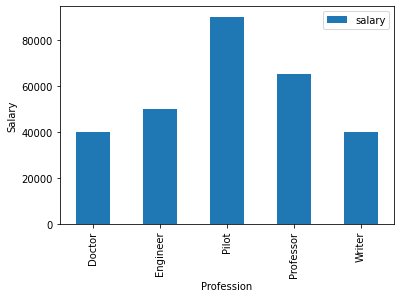

In [51]:
# plot results
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('dump.tsv', sep='\t')

df.plot(kind='bar', x='profession', y='salary')
plt.ylabel('Salary')
plt.xlabel('Profession')
plt.show()

### Hive Functions

In [52]:
# show (top 50) functions

str = """
SHOW FUNCTIONS;
"""

!{HIVE_HOME}/bin/hive -e "{str}" | head -n 50

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/apache-hive-3.1.2-bin/lib/log4j-slf4j-impl-2.10.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop-3.3.1/share/hadoop/common/lib/slf4j-log4j12-1.7.30.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Hive Session ID = 564e584f-57f7-4a2f-bb22-ff5eb8f5ca30

Logging initialized using configuration in jar:file:/usr/local/apache-hive-3.1.2-bin/lib/hive-common-3.1.2.jar!/hive-log4j2.properties Async: true
Hive Session ID = 1635d50c-730d-4fe3-bea2-057bb5c2155d
OK
!
!=
$sum0
%
&
*
+
-
/
<
<=
<=>
<>
=
==
>
>=
^
abs
acos
add_months
aes_decrypt
aes_encrypt
and
array
array_contains
ascii
asin
assert_true
assert_true_oom
atan
avg
base64
between
bin
bloom_filter
bround
cardinality_violation
case
cbrt
ce

### HiveQL Word Count

In [53]:
# compute the word count of all text files in the input directory and send the top 100 to a local file

str = """
CREATE TABLE IF NOT EXISTS userdb.files 
(line STRING);

LOAD DATA LOCAL INPATH '/root/input/' OVERWRITE INTO TABLE userdb.files;

CREATE TABLE IF NOT EXISTS userdb.word_count AS
  SELECT word, count(1) AS count 
  FROM
    (SELECT explode(split(lower(line), ' ')) AS word
    FROM userdb.files) w
  WHERE word != ''
  GROUP BY word
  ORDER BY word;

SELECT *
FROM userdb.word_count
ORDER BY count DESC
LIMIT 10;
"""

!{HIVE_HOME}/bin/hive -e "{str}" > wordfreq.tsv

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/apache-hive-3.1.2-bin/lib/log4j-slf4j-impl-2.10.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop-3.3.1/share/hadoop/common/lib/slf4j-log4j12-1.7.30.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Hive Session ID = 319932f4-2687-4012-9055-b7f585b0e4f8

Logging initialized using configuration in jar:file:/usr/local/apache-hive-3.1.2-bin/lib/hive-common-3.1.2.jar!/hive-log4j2.properties Async: true
Hive Session ID = 642e66d0-f34d-4187-85d7-c46797fa908e
OK
Time taken: 2.015 seconds
Loading data to table userdb.files
OK
Time taken: 0.638 seconds
Query ID = root_20220223103042_b03d545c-cf64-4ee0-b4a4-437a81815c9d
Total jobs = 2
Launching Job 1 out of 2
Number of reduce tasks not specified. E

In [54]:
# see content (top 10 lines) of local file
!head -n 10 wordfreq.tsv

the	116
of	71
or	66
and	52
to	42
any	31
for	28
you	26
this	25
in	25


### Hive Custom MapReduce Script (User Defined Function)

In [55]:
# download hiveudf.py (get link from Github)
!wget {GIT_FILES}/hive/hiveudf.py -O ~/hiveudf.py

--2022-02-23 10:30:50--  https://raw.githubusercontent.com/malcosta/bigdatatechnologies/main/hive/hiveudf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 270 [text/plain]
Saving to: ‘/root/hiveudf.py’

/root/hiveudf.py    100%[===================>]     270  --.-KB/s    in 0s      

2022-02-23 10:30:50 (15.3 MB/s) - ‘/root/hiveudf.py’ saved [270/270]



In [56]:
# test python script
!echo -e '1\tProfessor' | python ~/hiveudf.py; echo -e '2\tProfessor' | python ~/hiveudf.py

Professor	even
rosseforP	odd


In [57]:
# query profession table using hiveudf script with custom function

str = """
ADD FILE /root/hiveudf.py;
FROM userdb.profession
SELECT TRANSFORM(id, description) 
USING 'hiveudf.py'
AS description, even_odd
"""

!{HIVE_HOME}/bin/hive -e "{str}"

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/apache-hive-3.1.2-bin/lib/log4j-slf4j-impl-2.10.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop-3.3.1/share/hadoop/common/lib/slf4j-log4j12-1.7.30.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Hive Session ID = fcf25970-2ae1-4cb0-b016-7cf670af1621

Logging initialized using configuration in jar:file:/usr/local/apache-hive-3.1.2-bin/lib/hive-common-3.1.2.jar!/hive-log4j2.properties Async: true
Hive Session ID = c3d09cd0-86c4-4f0e-82fa-cc0ae8393adf
Added resources: [/root/hiveudf.py]
Query ID = root_20220223103102_0a661532-5de3-4337-a1ae-3c3d37777b1e
Total jobs = 1
Launching Job 1 out of 1
Number of reduce tasks is set to 0 since there's no reduce operator
Job running in-process (loca

<a name="install_pig"></a>
# Install Pig

In [ ]:
# download pig (check last version at https://pig.apache.org/releases.html)
!wget https://dlcdn.apache.org/pig/pig-{PIG_VERSION}/pig-{PIG_VERSION}.tar.gz

--2022-02-22 19:30:07--  https://dlcdn.apache.org/pig/pig-0.17.0/pig-0.17.0.tar.gz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 230606579 (220M) [application/x-gzip]
Saving to: ‘pig-0.17.0.tar.gz’

pig-0.17.0.tar.gz   100%[===================>] 219.92M   220MB/s    in 1.0s    

2022-02-22 19:30:09 (220 MB/s) - ‘pig-0.17.0.tar.gz’ saved [230606579/230606579]



In [ ]:
# uncompress pig file
!tar -xzvf pig-{PIG_VERSION}.tar.gz > /dev/null

In [ ]:
# move pig directory
!mv pig-{PIG_VERSION}/ /usr/local/

In [ ]:
# set PIG_HOME environment variable
os.environ['PIG_HOME'] = PIG_HOME
os.environ['PIG_CLASSPATH'] = HADOOP_HOME+"/conf"
os.environ['PATH'] = os.environ['PATH']+":"+os.environ['PIG_HOME']+"/bin"

In [ ]:
# check pig version
!pig –version

2022-02-22 19:30:15,157 INFO pig.ExecTypeProvider: Trying ExecType : LOCAL
2022-02-22 19:30:15,158 INFO pig.ExecTypeProvider: Trying ExecType : MAPREDUCE
2022-02-22 19:30:15,159 INFO pig.ExecTypeProvider: Picked MAPREDUCE as the ExecType
2022-02-22 19:30:15,263 [main] INFO  org.apache.pig.Main - Apache Pig version 0.17.0 (r1797386) compiled Jun 02 2017, 15:41:58
2022-02-22 19:30:15,263 [main] INFO  org.apache.pig.Main - Logging error messages to: /content/pig_1645558215255.log
2022-02-22 19:30:15,705 [main] ERROR org.apache.pig.Main - ERROR 2997: Encountered IOException. File –version does not exist
Details at logfile: /content/pig_1645558215255.log
2022-02-22 19:30:15,730 [main] INFO  org.apache.pig.Main - Pig script completed in 638 milliseconds (638 ms)


In [ ]:
# list pig commands
!pig -h


Apache Pig version 0.17.0 (r1797386) 
compiled Jun 02 2017, 15:41:58

USAGE: Pig [options] [-] : Run interactively in grunt shell.
       Pig [options] -e[xecute] cmd [cmd ...] : Run cmd(s).
       Pig [options] [-f[ile]] file : Run cmds found in file.
  options include:
    -4, -log4jconf - Log4j configuration file, overrides log conf
    -b, -brief - Brief logging (no timestamps)
    -c, -check - Syntax check
    -d, -debug - Debug level, INFO is default
    -e, -execute - Commands to execute (within quotes)
    -f, -file - Path to the script to execute
    -g, -embedded - ScriptEngine classname or keyword for the ScriptEngine
    -h, -help - Display this message. You can specify topic to get help for that topic.
        properties is the only topic currently supported: -h properties.
    -i, -version - Display version information
    -l, -logfile - Path to client side log file; default is current working directory.
    -m, -param_file - Path to the parameter file
    -p, -param - K

<a name="pig"></a>
# Pig Programs

### Word Count

In [ ]:
# download wordcount.pig script (get link from Github)
!wget {GIT_FILES}/pig/wordcount.pig -O ~/wordcount.pig

--2022-02-05 15:55:59--  https://raw.githubusercontent.com/malcosta/bigdatatechnologies/main/pig/wordcount.pig
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 593 [text/plain]
Saving to: ‘/root/wordcount.pig’

/root/wordcount.pig 100%[===================>]     593  --.-KB/s    in 0s      

2022-02-05 15:56:00 (15.0 MB/s) - ‘/root/wordcount.pig’ saved [593/593]



In [ ]:
# execute pig script
!pig -x mapreduce ~/wordcount.pig

2022-02-05 15:56:02,538 INFO pig.ExecTypeProvider: Trying ExecType : LOCAL
2022-02-05 15:56:02,540 INFO pig.ExecTypeProvider: Trying ExecType : MAPREDUCE
2022-02-05 15:56:02,540 INFO pig.ExecTypeProvider: Picked MAPREDUCE as the ExecType
2022-02-05 15:56:02,637 [main] INFO  org.apache.pig.Main - Apache Pig version 0.17.0 (r1797386) compiled Jun 02 2017, 15:41:58
2022-02-05 15:56:02,637 [main] INFO  org.apache.pig.Main - Logging error messages to: /content/pig_1644076562622.log
2022-02-05 15:56:03,058 [main] INFO  org.apache.pig.impl.util.Utils - Default bootup file /root/.pigbootup not found
2022-02-05 15:56:03,130 [main] INFO  org.apache.hadoop.conf.Configuration.deprecation - mapred.job.tracker is deprecated. Instead, use mapreduce.jobtracker.address
2022-02-05 15:56:03,131 [main] INFO  org.apache.pig.backend.hadoop.executionengine.HExecutionEngine - Connecting to hadoop file system at: file:///
2022-02-05 15:56:03,174 [main] INFO  org.apache.pig.PigServer - Pig Script ID for the ses

### Pig Custom Script (User Defined Function)

In [ ]:
# download pigudf.py with custom function (get link from Github)
!wget {GIT_FILES}/pig/pigudf.py -O ~/pigudf.py

# download customfunct.pig script (get link from Github)
!wget {GIT_FILES}/pig/customfunct.pig -O ~/customfunct.pig

--2022-02-05 15:56:29--  https://raw.githubusercontent.com/malcosta/bigdatatechnologies/main/pig/pigudf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 210 [text/plain]
Saving to: ‘/root/pigudf.py’

/root/pigudf.py     100%[===================>]     210  --.-KB/s    in 0s      

2022-02-05 15:56:30 (10.1 MB/s) - ‘/root/pigudf.py’ saved [210/210]

--2022-02-05 15:56:30--  https://raw.githubusercontent.com/malcosta/bigdatatechnologies/main/pig/customfunct.pig
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299 [text/plain]
Saving

In [ ]:
# execute pig script
!pig -x mapreduce ~/customfunct.pig

2022-02-05 15:56:32,392 INFO pig.ExecTypeProvider: Trying ExecType : LOCAL
2022-02-05 15:56:32,394 INFO pig.ExecTypeProvider: Trying ExecType : MAPREDUCE
2022-02-05 15:56:32,394 INFO pig.ExecTypeProvider: Picked MAPREDUCE as the ExecType
2022-02-05 15:56:32,475 [main] INFO  org.apache.pig.Main - Apache Pig version 0.17.0 (r1797386) compiled Jun 02 2017, 15:41:58
2022-02-05 15:56:32,475 [main] INFO  org.apache.pig.Main - Logging error messages to: /content/pig_1644076592466.log
2022-02-05 15:56:32,931 [main] INFO  org.apache.pig.impl.util.Utils - Default bootup file /root/.pigbootup not found
2022-02-05 15:56:33,025 [main] INFO  org.apache.hadoop.conf.Configuration.deprecation - mapred.job.tracker is deprecated. Instead, use mapreduce.jobtracker.address
2022-02-05 15:56:33,026 [main] INFO  org.apache.pig.backend.hadoop.executionengine.HExecutionEngine - Connecting to hadoop file system at: file:///
2022-02-05 15:56:33,074 [main] INFO  org.apache.pig.PigServer - Pig Script ID for the ses

<a name="challenge"></a>
# Real Challenge

Example of how to find the movies with the highest average rating that received at least 100 ratings, using the MovieLens 100K dataset (https://grouplens.org/datasets/movielens/).
- u.data contains the movie ratings (user_id, movie_id, rating, time)
- u.item contains the movie titles (movie_id, movie_title, ...)

In [58]:
# download movielens dataset
!wget https://files.grouplens.org/datasets/movielens/ml-100k/u.item -O ~/u.item
!wget https://files.grouplens.org/datasets/movielens/ml-100k/u.data -O ~/u.data

--2022-02-23 10:31:07--  https://files.grouplens.org/datasets/movielens/ml-100k/u.item
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 236344 (231K)
Saving to: ‘/root/u.item’

/root/u.item        100%[===================>] 230.80K   342KB/s    in 0.7s    

2022-02-23 10:31:09 (342 KB/s) - ‘/root/u.item’ saved [236344/236344]

--2022-02-23 10:31:09--  https://files.grouplens.org/datasets/movielens/ml-100k/u.data
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1979173 (1.9M)
Saving to: ‘/root/u.data’

/root/u.data        100%[===================>]   1.89M  1.60MB/s    in 1.2s    

2022-02-23 10:31:11 (1.60 MB/s) - ‘/root/u.data’ saved [1979173/1979173]



In [59]:
# copy movielens dataset to HDFS
!{HADOOP_HOME}/bin/hdfs dfs -copyFromLocal ~/u.item ~/input/
!{HADOOP_HOME}/bin/hdfs dfs -copyFromLocal ~/u.data ~/input/

In [60]:
# show first 5 lines
!{HADOOP_HOME}/bin/hdfs dfs -cat ~/input/u.item | head -n 5
!{HADOOP_HOME}/bin/hdfs dfs -cat ~/input/u.data | head -n 5

1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0
2|GoldenEye (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?GoldenEye%20(1995)|0|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
3|Four Rooms (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
4|Get Shorty (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)|0|1|0|0|0|1|0|0|1|0|0|0|0|0|0|0|0|0|0
5|Copycat (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Copycat%20(1995)|0|0|0|0|0|0|1|0|1|0|0|0|0|0|0|0|1|0|0
cat: Unable to write to output stream.
196	242	3	881250949
186	302	3	891717742
22	377	1	878887116
244	51	2	880606923
166	346	1	886397596
cat: Unable to write to output stream.


### MapReduce Solution (with MRJob)

In [ ]:
# download mrjob code to find best movies
!wget {GIT_FILES}/mrjob/bestmovies_mrjob.py -O ~/bestmovies_mrjob.py

--2022-02-05 15:57:50--  https://raw.githubusercontent.com/malcosta/bigdatatechnologies/main/mrjob/bestmovies_mrjob.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1273 (1.2K) [text/plain]
Saving to: ‘/root/bestmovies_mrjob.py’

/root/bestmovies_mr 100%[===================>]   1.24K  --.-KB/s    in 0s      

2022-02-05 15:57:50 (90.4 MB/s) - ‘/root/bestmovies_mrjob.py’ saved [1273/1273]



In [ ]:
#!python ~/bestmovies_mrjob.py -r hadoop ~/u.data
!python ~/bestmovies_mrjob.py ~/u.data

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/bestmovies_mrjob.root.20220205.160027.636559
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/bestmovies_mrjob.root.20220205.160027.636559/output
Streaming final output from /tmp/bestmovies_mrjob.root.20220205.160027.636559/output...
"408"	["Close Shave, A (1995)", 4.491071428571429]
"318"	["Schindler's List (1993)", 4.466442953020135]
"169"	["Wrong Trousers, The (1993)", 4.466101694915254]
"483"	["Casablanca (1942)", 4.45679012345679]
"64"	["Shawshank Redemption, The (1994)", 4.445229681978798]
"603"	["Rear Window (1954)", 4.3875598086124405]
"12"	["Usual Suspects, The (1995)", 4.385767790262173]
"50"	["Star Wars (1977)", 4.3584905660377355]
"178"	["12 Angry Men (1957)", 4.344]
"134"	["Citizen Kane (1941)", 4.292929292929293]
Removing temp directory /tmp/bestmovies_mrjob.root.20220205.160027.636559...


### Hive Solution

In [61]:
#create tables 
str = """
CREATE TABLE IF NOT EXISTS userdb.ratings
(userId INT, movieId INT, rating INT, ratingTime INT)
ROW FORMAT DELIMITED
FIELDS TERMINATED BY '\t'
LINES TERMINATED BY '\n'
STORED AS TEXTFILE;

CREATE TABLE IF NOT EXISTS userdb.movies
(movieId int, movieTitle varchar(200), releaseDate date, videoReleaseDate date, imdbUrl varchar(300), flagGenreUnknown int, flagGenreAction int, flagGenreAdventure int, flagGenreAnimation int, flagGenreChildrens int, flagGenreComedy int, flagGenreCrime int, flagGenreDocumentary int, flagGenreDrama int, flagGenreFantasy int, flagGenreFilmNoir int, flagGenreHorror int, flagGenreMusical int,  flagGenreMystery int, flagGenreRomance int, flagGenreSciFi int, flagGenreThriller int, flagGenreWar int, flagGenreWestern int)
ROW FORMAT DELIMITED
FIELDS TERMINATED BY '|'
LINES TERMINATED BY '\n'
STORED AS TEXTFILE;
"""

!{HIVE_HOME}/bin/hive -e "{str}"

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/apache-hive-3.1.2-bin/lib/log4j-slf4j-impl-2.10.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop-3.3.1/share/hadoop/common/lib/slf4j-log4j12-1.7.30.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Hive Session ID = 280eebcb-7a82-4d41-89c8-9439bd984817

Logging initialized using configuration in jar:file:/usr/local/apache-hive-3.1.2-bin/lib/hive-common-3.1.2.jar!/hive-log4j2.properties Async: true
Hive Session ID = 2ace26e5-d2c4-42a8-89f0-5315c34b5b6b
OK
Time taken: 2.015 seconds
OK
Time taken: 0.106 seconds


In [62]:
# load data
str = """
LOAD DATA LOCAL INPATH '/root/input/u.data'
OVERWRITE INTO TABLE userdb.ratings;

LOAD DATA LOCAL INPATH '/root/input/u.item'
OVERWRITE INTO TABLE userdb.movies;
"""

!{HIVE_HOME}/bin/hive -e "{str}"

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/apache-hive-3.1.2-bin/lib/log4j-slf4j-impl-2.10.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop-3.3.1/share/hadoop/common/lib/slf4j-log4j12-1.7.30.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Hive Session ID = 4c082bc4-e64a-4324-be6a-9b03a1b95697

Logging initialized using configuration in jar:file:/usr/local/apache-hive-3.1.2-bin/lib/hive-common-3.1.2.jar!/hive-log4j2.properties Async: true
Hive Session ID = 3d2ddcbf-670e-4100-bd96-55514e5d698b
Loading data to table userdb.ratings
OK
Time taken: 2.415 seconds
Loading data to table userdb.movies
OK
Time taken: 0.353 seconds


In [63]:
# show top 10 rows from both tables
str = """
select * 
from userdb.ratings 
limit 10;

select movieId, movieTitle 
from userdb.movies 
limit 10;
"""

!{HIVE_HOME}/bin/hive -e "{str}"

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/apache-hive-3.1.2-bin/lib/log4j-slf4j-impl-2.10.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop-3.3.1/share/hadoop/common/lib/slf4j-log4j12-1.7.30.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Hive Session ID = 9e92e94b-0aae-418a-88bb-b8fd3d017a73

Logging initialized using configuration in jar:file:/usr/local/apache-hive-3.1.2-bin/lib/hive-common-3.1.2.jar!/hive-log4j2.properties Async: true
Hive Session ID = f1bbc923-bb8e-4aad-be33-f844acf734aa
OK
196	242	3	881250949
186	302	3	891717742
22	377	1	878887116
244	51	2	880606923
166	346	1	886397596
298	474	4	884182806
115	265	2	881171488
253	465	5	891628467
305	451	3	886324817
6	86	3	883603013
Time taken: 3.577 seconds, Fetched: 10 row

In [64]:
# show the 10 movies with the highest average rating and which received at least 100 ratings
str = """
with rat as 
  (select movieId, avg(rating) as avgRating, count(*) as cnt 
  from userdb.ratings 
  group by movieId) 
select rat.movieId, mov.movieTitle, rat.avgRating 
from rat join userdb.movies mov on rat.movieId=mov.movieId 
where cnt >= 100
order by avgRating desc 
limit 10;
"""

!{HIVE_HOME}/bin/hive -e "{str}"

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/apache-hive-3.1.2-bin/lib/log4j-slf4j-impl-2.10.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop-3.3.1/share/hadoop/common/lib/slf4j-log4j12-1.7.30.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Hive Session ID = 3cecd3a1-f476-4907-bf00-ff29537e2754

Logging initialized using configuration in jar:file:/usr/local/apache-hive-3.1.2-bin/lib/hive-common-3.1.2.jar!/hive-log4j2.properties Async: true
Hive Session ID = 2f1f8dd9-1113-4547-a46d-30558ffb19c0
Query ID = root_20220223110009_6d1a1099-b3c0-48b7-8a8d-d88e239b014e
Total jobs = 2
Launching Job 1 out of 2
Number of reduce tasks not specified. Estimated from input data size: 1
In order to change the average load for a reducer (in bytes)

Individual Hands-on Exercise: MovieLens 100K Challenge 2

In [67]:
# Find the top 10 movies with the longest title that received at least 10 ratings
str = """
WITH ratings_total as (
SELECT movieid, COUNT(RATING) as cnt_rt
FROM userdb.ratings
GROUP BY movieid
)
SELECT a.movieid, length(a.movieTitle) as len_movie, a.movieTitle
from userdb.movies a
inner join ratings_total b
on a.movieid = b.movieid
where cnt_rt>10
group by a.movieid, a.movieTitle
order by length(a.movieTitle) desc
;
"""

!{HIVE_HOME}/bin/hive -e "{str}"

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/apache-hive-3.1.2-bin/lib/log4j-slf4j-impl-2.10.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop-3.3.1/share/hadoop/common/lib/slf4j-log4j12-1.7.30.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Hive Session ID = 704388f1-b290-49b4-8c47-9b196098f1ef

Logging initialized using configuration in jar:file:/usr/local/apache-hive-3.1.2-bin/lib/hive-common-3.1.2.jar!/hive-log4j2.properties Async: true
Hive Session ID = 87bd06b9-6388-4208-aace-3c38b43f94a9
Query ID = root_20220223111814_3f63dc43-5ae9-4fe8-96c2-a78083d0536f
Total jobs = 3
Launching Job 1 out of 3
Number of reduce tasks not specified. Estimated from input data size: 1
In order to change the average load for a reducer (in bytes)

SyntaxError: ignored

### Pig Solution

In [ ]:
# download pig code to find best movies
!wget {GIT_FILES}/pig/bestmovies.pig -O ~/bestmovies.pig

--2022-02-05 16:13:42--  https://raw.githubusercontent.com/malcosta/bigdatatechnologies/main/pig/bestmovies.pig
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 700 [text/plain]
Saving to: ‘/root/bestmovies.pig’

/root/bestmovies.pi 100%[===================>]     700  --.-KB/s    in 0s      

2022-02-05 16:13:42 (29.9 MB/s) - ‘/root/bestmovies.pig’ saved [700/700]



In [ ]:
# execute pig script
!pig -x mapreduce ~/bestmovies.pig

2022-02-05 16:13:44,794 INFO pig.ExecTypeProvider: Trying ExecType : LOCAL
2022-02-05 16:13:44,796 INFO pig.ExecTypeProvider: Trying ExecType : MAPREDUCE
2022-02-05 16:13:44,796 INFO pig.ExecTypeProvider: Picked MAPREDUCE as the ExecType
2022-02-05 16:13:44,909 [main] INFO  org.apache.pig.Main - Apache Pig version 0.17.0 (r1797386) compiled Jun 02 2017, 15:41:58
2022-02-05 16:13:44,909 [main] INFO  org.apache.pig.Main - Logging error messages to: /content/pig_1644077624893.log
2022-02-05 16:13:45,423 [main] INFO  org.apache.pig.impl.util.Utils - Default bootup file /root/.pigbootup not found
2022-02-05 16:13:45,509 [main] INFO  org.apache.hadoop.conf.Configuration.deprecation - mapred.job.tracker is deprecated. Instead, use mapreduce.jobtracker.address
2022-02-05 16:13:45,509 [main] INFO  org.apache.pig.backend.hadoop.executionengine.HExecutionEngine - Connecting to hadoop file system at: file:///
2022-02-05 16:13:45,558 [main] INFO  org.apache.pig.PigServer - Pig Script ID for the ses

# Final Message

Congratulations if you reached the end of this Notebook successfully! 

It was a long work to explore and understand how to solve Big Data problems with different Big Data technologies. Despite the simplicity of the problems presented, they require the use of typical data operations such as read, store, join, aggregate, filter, and apply user-defined transformations. These operations form the basis for more complex applications that you should try to implement. Good luck. 